<a href="https://colab.research.google.com/github/Kovalivska/Python/blob/Study/Isolation_Forest_anomaly_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Isolation_Forest_theory

Isolation Forest: Implementation
Introduction
In this lesson, we’re going to explore Isolation Forest, a popular algorithm for detecting anomalies or outliers. We will implement this using the Breast Cancer dataset, which contains 30 features describing the characteristics of cell nuclei from breast cancer biopsies. This lesson will guide you through both the theory and the practical steps to implement Isolation Forest in Python.
What is Isolation Forest?
Isolation Forest detects anomalies by isolating data points through recursive partitioning. The fewer splits needed to isolate a point, the more likely it is to be an anomaly.
Key Parameters of Isolation Forest Algorithm:
n_estimators: Number of trees in the forest.
max_samples: Number of data points used to train each tree.
contamination: Proportion of outliers expected in the data.
max_features: Number of features considered for each split.
We will talk later on in the lesson what is an approach to set and tune these values. For now, just keep in mind that these are the parameters that affect the way this algo works.
Now, let’s go with the actual implementation!
Step-by-Step Isolation Forest Implementation with the Breast Cancer Dataset

In [1]:
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Check the shape of the data
print(X.shape)  # Output: (569, 30)

(569, 30)


In [ ]:
# Initialize Isolation Forest with 100 trees and contamination set to 0.1
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model to the dataset
iso_forest.fit(X)

2. Initializing and Training the Isolation Forest Model
Next, we initialize the Isolation Forest model and fit it to the dataset. We’ll use 100 trees (n_estimators) as a good starting point. Besides that, we’ll set the contamination rate to 0.1 (i.e., we expect 10% of the data points to be outliers which is also a good rough estimate for the majority of the cases. To get a better idea, how many outliers there are, you may consider conducting more detailed exploratory analysis of your data.) So, getting back to the Isolation Forest training:

3. Predicting Anomalies
After training the model, we can predict which data points are anomalies. The algorithm labels anomalies as -1 and normal points as 1.

In [3]:
# Get anomaly predictions
predictions = iso_forest.predict(X)

# Extract anomalies and normal points
anomalies = X[predictions == -1]
normal_points = X[predictions == 1]

Where:
The predict(X) method generates predictions for each data point, labeling it as either 1 (normal) or -1 (anomalous).
We separate the anomalies and normal points into two different arrays (anomalies and normal_points).

4. Visualizing Results
To visualize the anomalies and normal points, we’ll plot them using only two features (e.g., feature 0 and feature 1) for simplicity.

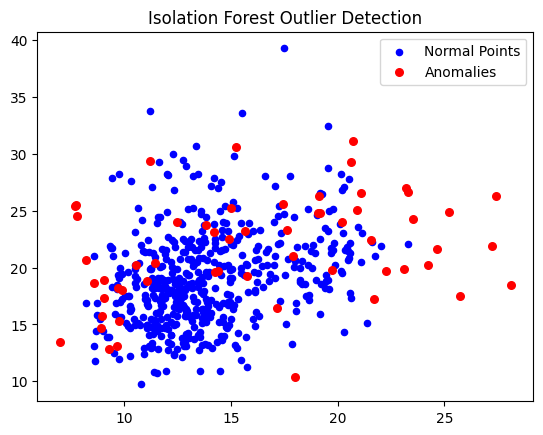

In [4]:
# Plot anomalies vs normal points using the first two features
plt.scatter(normal_points[:, 0], normal_points[:, 1], label="Normal Points", c='blue', s=20)
plt.scatter(anomalies[:, 0], anomalies[:, 1], label="Anomalies", c='red', s=30)
plt.title("Isolation Forest Outlier Detection")
plt.legend()
plt.show()

Here is the brief explanation for the above code:
We used plt.scatter() to create a scatter plot.
Normal points are colored blue, and anomalies are colored red. This is what we set in the c parameter of plt.scatter.
For simplicity, we only plot the first two features ([:, 0] and [:, 1]).


Evaluating the Model

To evaluate the performance of our Isolation Forest model, we can use the F1 score. This metric is particularly useful for anomaly detection since the classes are often imbalanced. Why? Because outliers detection is nothing but a classification problem. Basically, we need to classify each point as an outlier or not an outlier. Metrics that we’ve mentioned are especially important for anomaly detection since the classes are often imbalanced. Remember, imbalanced datasets and the model that are trained based on them are not evaluated via Accuracy because it may lead us to a biased idea on how good the model is
The Breast Cancer dataset doesn’t provide targets that will clearly tell us which points are anomalies and which aren’t. So, to calculate the metrics, we will do a trick: we will create a true label array indicating known anomalies by ourselves. For demonstration purposes, we will randomly simulate a few anomalies. Here is how we do it:

In [5]:
import numpy as np

# Simulate true labels: 0 for normal, 1 for anomalies
true_labels = np.zeros(len(X))
# Randomly assign 10% of the samples as anomalies (1s)
anomaly_indices = np.random.choice(len(X), size=int(len(X) * 0.1), replace=False)
true_labels[anomaly_indices] = 1

Here we:
Created an array true_labels initialized to 0 (normal).
Randomly selected 10% of indices and set them to 1 to simulate known anomalies.
Now, the metric value calculation!

Calculating Metrics


In [6]:
from sklearn.metrics import f1_score

# Adjust predictions for comparison with true labels
adjusted_predictions = np.where(predictions == -1, 1, 0)

# Calculate the F1 score
f1 = f1_score(true_labels, adjusted_predictions)
print(f"F1 Score: {f1:.4f}")

F1 Score: 0.1239


What have we just done?
We adjusted the predictions to match our simulated true labels, converting -1 to 1 (anomaly) and 1 to 0 (normal).
We then computed the F1 score using f1_score() and print it.
Here is the result that the above code produces.

What do you think about the resulting metric value! Well, it turned out to be that our model isn’t that great, so what do we do? We try to improve it by setting up different parameters! Let’s now explore what exactly we may change to make the model better!

Improving the Model By Playing Around With The Parameters


Fine-tuning an Isolation Forest model can significantly improve its performance, especially when it comes to finding outliers that matter for your specific use case. Let’s break down the key parameters you can tune:
1. n_estimators (Number of Trees)
What it does: This controls the number of decision trees used in the ensemble. More trees generally result in better performance because more trees can average out random variations in the data.
Why it's important: Increasing this value can improve accuracy but will also increase computational time.
Tip: If you're dealing with a large dataset, start with a moderate number (e.g., 100) and increase gradually to balance performance and speed.
For instance, we could’ve tried training our Isolation Forest with the . n_estimators equal to 200. Not surprisingly, we need to make just a single change:

In [7]:
# Try increasing the number of estimators for potentially better performance
iso_forest = IsolationForest(n_estimators=200, contamination=0.1, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.1, n_estimators=200, random_state=42)

2. contamination (Proportion of Outliers)
What it does: This parameter defines the expected proportion of outliers in the dataset. It’s important to get this right, as it directly influences the threshold for labeling points as anomalies.
Why it's important: Setting contamination too high can result in too many false positives, and setting it too low may overlook real outliers.
Tip: If you're unsure about the contamination rate, start with a value around 0.1 or 0.05, then adjust based on your understanding of the data.
Here is how we set the contamination parameter in code:

In [8]:
# Adjust the contamination rate if you expect a different proportion of outliers
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

max_samples (Number of Samples Per Tree)
What it does: This controls the number of data points used to train each tree in the forest. By default, it's set to the total number of samples in the dataset, but you can reduce this to speed up the training process.
Why it's important: Reducing max_samples can speed up the model, but setting it too low might reduce performance. On smaller datasets, you can leave it as the default (i.e., using the whole dataset).
Tip: Use a smaller value for very large datasets (e.g., 256 or 512) to speed up training.
In code, setting up max_samples value look like this:

In [ ]:
# Try limiting the number of features used for each split
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, max_features=10, random_state=42)
iso_forest.fit(X)

Changing values for the parameters we’ve just described can significantly impact the way the model works, increasing our F1 score!

Conclusion

Fine-tuning Isolation Forest involves balancing accuracy with computational efficiency. While n_estimators and contamination are typically the most important parameters, adjusting max_samples and max_features can also lead to improvements based on the dataset's size and complexity. Experimenting with different settings and evaluating model performance on your data is key to finding the right balance.
As always, the next lesson is going to be dedicated to practice where you’ll implement your own isolation forest to find outliers

#Isolation Forest: Practice, Part 1

In [15]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)

# Check the shape of the dataset
print(X.shape)

(20640, 8)


In [13]:
from sklearn.ensemble import IsolationForest

In [16]:
# Initialize Isolation Forest with 100 trees and contamination set to 0.1
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)

# Fit the model to the dataset
iso_forest.fit(X)

IsolationForest(contamination=0.1, random_state=42)

In [17]:
# Get anomaly predictions (fill in the blank)
predictions = iso_forest.predict(X)

# Extract anomalies and normal points
anomalies = X[predictions == -1]
normal_points = X[predictions == 1]

# Print the number of anomalies detected
print("Number of anomalies detected:", len(anomalies))

Number of anomalies detected: 2064


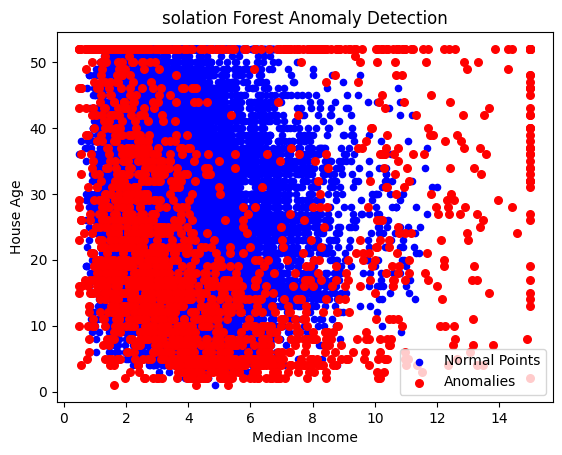

In [19]:
import matplotlib.pyplot as plt

# Plot anomalies vs normal points (fill in the blanks)
plt.scatter(normal_points['MedInc'], normal_points['HouseAge'], label="Normal Points", c='blue', s=20)
plt.scatter(anomalies['MedInc'], anomalies['HouseAge'], label="Anomalies", c='red', s=30)
plt.title('solation Forest Anomaly Detection')
plt.xlabel('Median Income')
plt.ylabel('House Age')
plt.legend()
plt.show()

In [ ]:
# Try increasing the number of estimators for potentially better performance
iso_forest = IsolationForest(n_estimators=200, contamination=0.1, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.1, n_estimators=200, random_state=42)

In [ ]:
# Get anomaly predictions (fill in the blank)
predictions = iso_forest.predict(X)

# Extract anomalies and normal points
anomalies = X[predictions == -1]
normal_points = X[predictions == 1]

# Print the number of anomalies detected
print("Number of anomalies detected:", len(anomalies))

Number of anomalies detected: 2064


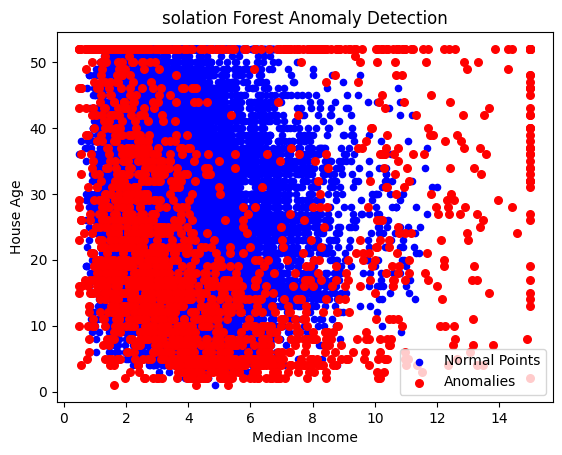

In [ ]:
import matplotlib.pyplot as plt

# Plot anomalies vs normal points (fill in the blanks)
plt.scatter(normal_points['MedInc'], normal_points['HouseAge'], label="Normal Points", c='blue', s=20)
plt.scatter(anomalies['MedInc'], anomalies['HouseAge'], label="Anomalies", c='red', s=30)
plt.title('solation Forest Anomaly Detection')
plt.xlabel('Median Income')
plt.ylabel('House Age')
plt.legend()
plt.show()

In [20]:
# Adjust the contamination rate if you expect a different proportion of outliers
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.05, random_state=42)

In [21]:
# Get anomaly predictions (fill in the blank)
predictions = iso_forest.predict(X)

# Extract anomalies and normal points
anomalies = X[predictions == -1]
normal_points = X[predictions == 1]

# Print the number of anomalies detected
print("Number of anomalies detected:", len(anomalies))

Number of anomalies detected: 1032


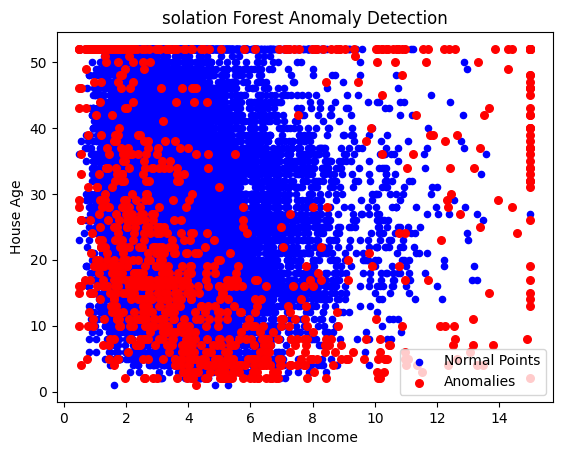

In [22]:
import matplotlib.pyplot as plt

# Plot anomalies vs normal points (fill in the blanks)
plt.scatter(normal_points['MedInc'], normal_points['HouseAge'], label="Normal Points", c='blue', s=20)
plt.scatter(anomalies['MedInc'], anomalies['HouseAge'], label="Anomalies", c='red', s=30)
plt.title('solation Forest Anomaly Detection')
plt.xlabel('Median Income')
plt.ylabel('House Age')
plt.legend()
plt.show()

In [24]:
# Try limiting the number of features used for each split
iso_forest = IsolationForest(n_estimators=100, contamination=0.1, max_features=5, random_state=42)
iso_forest.fit(X)

IsolationForest(contamination=0.1, max_features=5, random_state=42)

In [25]:
# Get anomaly predictions (fill in the blank)
predictions = iso_forest.predict(X)

# Extract anomalies and normal points
anomalies = X[predictions == -1]
normal_points = X[predictions == 1]

# Print the number of anomalies detected
print("Number of anomalies detected:", len(anomalies))

Number of anomalies detected: 2064


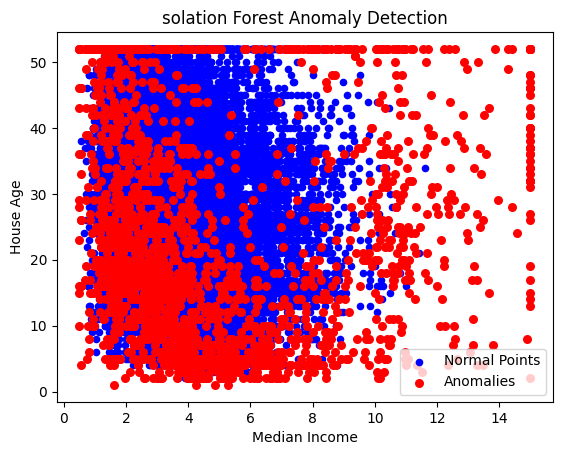

In [26]:
import matplotlib.pyplot as plt

# Plot anomalies vs normal points (fill in the blanks)
plt.scatter(normal_points['MedInc'], normal_points['HouseAge'], label="Normal Points", c='blue', s=20)
plt.scatter(anomalies['MedInc'], anomalies['HouseAge'], label="Anomalies", c='red', s=30)
plt.title('solation Forest Anomaly Detection')
plt.xlabel('Median Income')
plt.ylabel('House Age')
plt.legend()
plt.show()